## BMI 6018 Term Project
### Members: Anwar Alsanea, Ryan Williams, and Imdad Islam

## 1.0 Introduction:

Our term project involves dealing with daily gas produced and feed for [digesters](https://en.wikipedia.org/wiki/Anaerobic_digestion) in wastewater treatment plants (WWTP).
We have obtained data from a local WWTP [Central Valley Water Reclamation Facility CVWRF](https://www.cvwrf.org/).

More info. on our project (Ryan will fill this out)
what is a digester?
what can we get from our data? 
this will sort of be like an abstract...

# Data:
Data will be imported into a dataframe from a csv file that contains gas produced in TCF (Trillion Cubic Feet) and total inputted feed in Gallons for month January - September (excluding August) for the year 2017.

In [1]:
# import csv file into dataframe:
import pandas as pd
import numpy as np
from ipywidgets import interact
DF = pd.read_csv('CVWRF.csv', header = 1,na_values=" NaN")
# pandas is reading the csv file and including all NaN rows at the bottom
# to delete those rows, use pandas DataFrame.dropna() function to delete and clean the file
DF.dropna(how = 'any',inplace=True)
# lets do more cleaning, I do not like the column names, lets change them
DF.rename(columns={'Gas produced (TCF)': 'egg1_gasproduced', 'Feed (Gallons)': 'egg1_feed',
                  'Gas produced (TCF).1':'egg2_gasproduced','Feed (Gallons).1':'egg2_feed'}, inplace=True)
# lets combine egg1 and egg2 numbers together so we only worry about the total of the two per day!
# create a new column that adds gasproduced
DF['total_gas'] = DF['egg1_gasproduced'] + DF['egg2_gasproduced']
DF['total_feed'] = DF['egg1_feed'] + DF['egg2_feed']
# print final dataframe
DF=DF.query("egg1_gasproduced>0")
DF.head(5)


/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Month,Day,Year,egg1_gasproduced,egg1_feed,egg2_gasproduced,egg2_feed,total_gas,total_feed
0,January,1.0,2017.0,369044.0,73565.0,370885.0,73540.0,739929.0,147105.0
1,January,2.0,2017.0,366223.0,72840.0,367482.0,72830.0,733705.0,145670.0
2,January,3.0,2017.0,357710.0,74340.0,350032.0,73380.0,707742.0,147720.0
3,January,4.0,2017.0,376082.0,68850.0,377382.0,68845.0,753464.0,137695.0
4,January,5.0,2017.0,362110.0,66045.0,360277.0,66040.0,722387.0,132085.0


In [ ]:
#concat function

/opt/conda/lib/python3.5/site-packages/pandas/plotting/_core.py:188: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


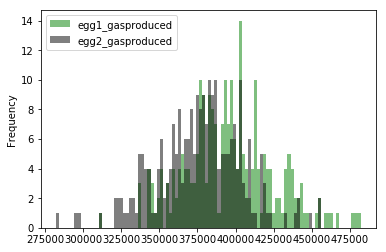

In [16]:
DF_1 = DF[["egg1_gasproduced","egg2_gasproduced"]]
DF_1.plot(kind="hist", bins=100, 
                    colors = ['green','black'],alpha=0.5)

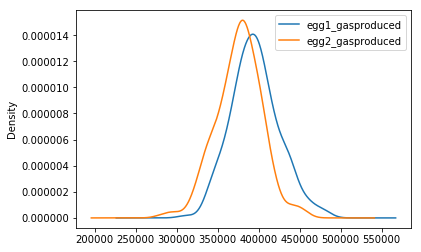

In [17]:
DF_1.plot(kind="kde")

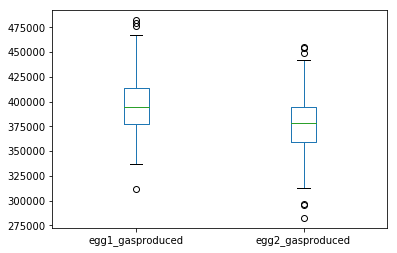

In [18]:
DF_1.plot(kind="box")

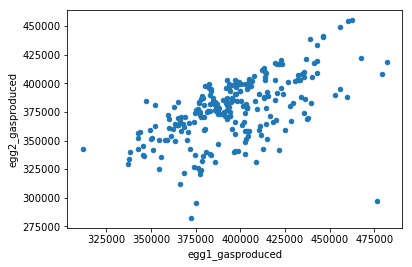

In [21]:
DF_1.plot(kind='scatter',x='egg1_gasproduced',y='egg2_gasproduced')

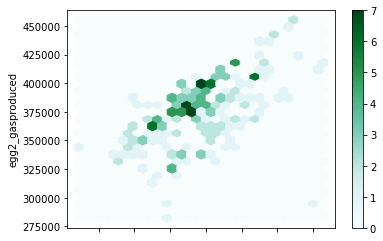

In [29]:
DF_1.plot(kind='hexbin',
                    x='egg1_gasproduced',
                    y='egg2_gasproduced',
                   gridsize=25)

In [25]:
from pandas.tools.plotting import scatter_matrix

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7bcadd978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd7bc9599e8>]], dtype=object)

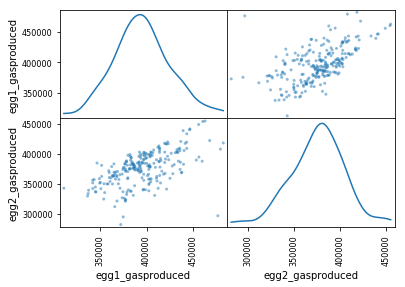

In [26]:
scatter_matrix(DF_1,diagonal='kde')

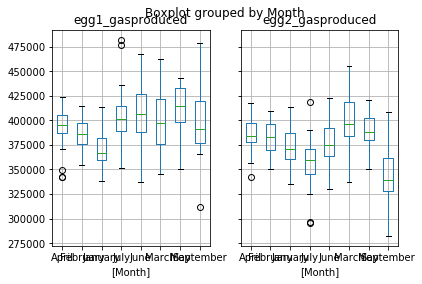

In [8]:
import matplotlib.pyplot as plt
print(DF.boxplot(column=["egg1_gasproduced","egg2_gasproduced"], by=["Month"]))

/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


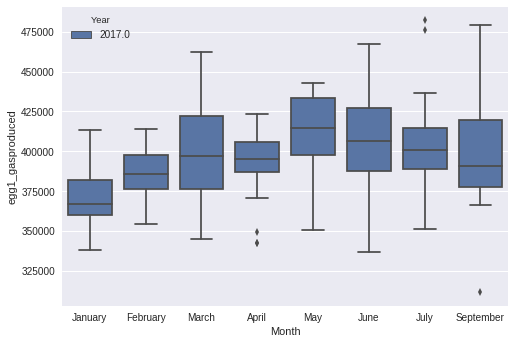

In [52]:
import seaborn as sns
sns.boxplot(x="Month", y="egg1_gasproduced", data=DF, hue="Year")

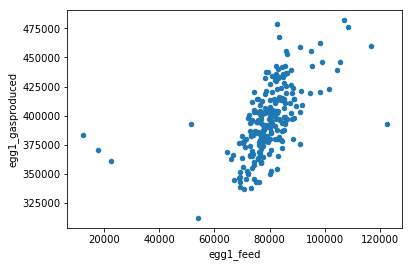

In [4]:
DF.plot.scatter(x="egg1_feed",y="egg1_gasproduced")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7bbe74eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd7bbac7b00>]], dtype=object)

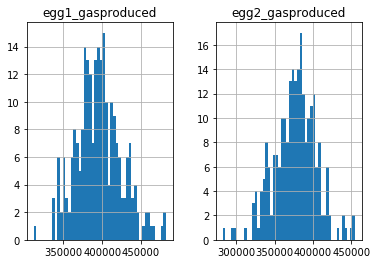

In [43]:
DF.hist(column=["egg1_gasproduced","egg2_gasproduced"], bins=50)

interactive(children=(Dropdown(description='number_of_days', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'), value='1'), Output()), _dom_classes=('widget-interact',))

<function __main__.Days_Of_Months>

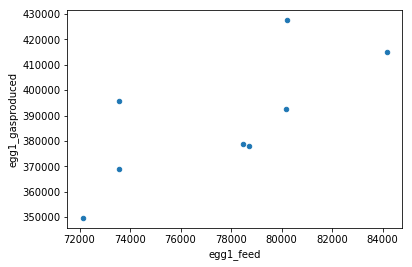

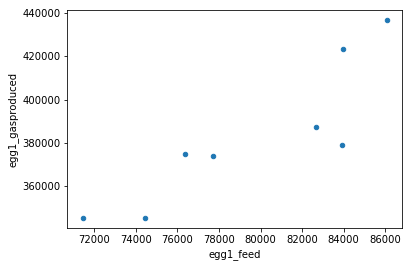

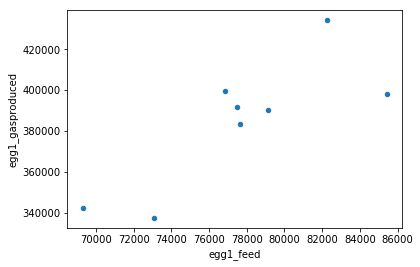

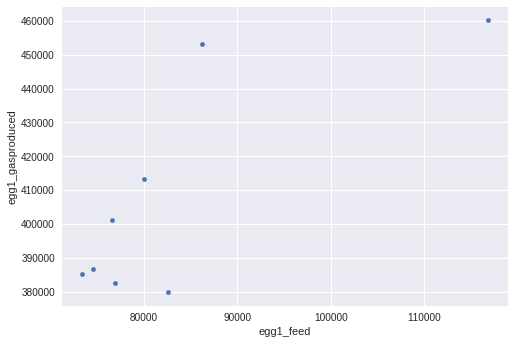

In [31]:
def Days_Of_Months(number_of_days):
    df_filtered = DF.loc[DF['Day'] == int(number_of_days)] 
    ax = df_filtered[["egg1_feed", "egg1_gasproduced"]].plot.scatter(x="egg1_feed",y="egg1_gasproduced")
    ax["egg1_gasproduced"].set_title("Day " + number_of_days)
    #print (df_filtered)

days = [str(day) for day in np.arange(1,32)]

interact(Days_Of_Months, number_of_days=days)

In [33]:
def Days_Of_Months1(Day_in_month):
    df_filtered = DF.loc[DF['Day'] == int(Day_in_month)] 
    ax = df_filtered[["Month", "egg1_gasproduced"]].boxplot( by="Month", return_type='axes')
    ax["egg1_gasproduced"].set_title("Day " + Day_in_month+" egg_1 gas production in trillion cubic foot")
    #print (df_filtered)

days = [str(day) for day in np.arange(1,32)]

interact(Days_Of_Months1, Day_in_month=days)

interactive(children=(Dropdown(description='Day_in_month', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'), value='1'), Output()), _dom_classes=('widget-interact',))

<function __main__.Days_Of_Months1>

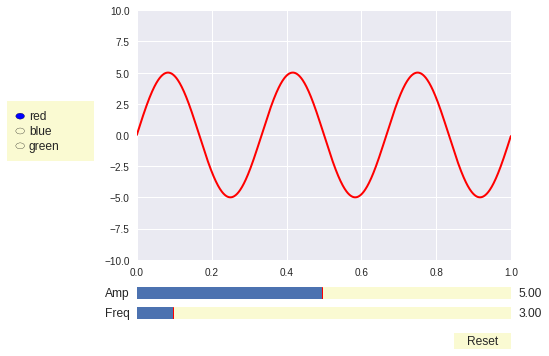

In [54]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()